# 3.2 Assignment: Using Data to Improve a Marketing Promotion

author: Rachel Nelson

class: DSC630-T301 Predictive Analytics (2221-1)

For this week’s assignment we're going to use Dodgers Major League Baseball data from 2012.
The data file you will be using is contained in the dodgers.csv file. I would like you to
determine what night would be the best to run a marketing promotion to increase attendance.
It is up to you if you decide to recommend a specific date or if you  recommend a day of the
week (e.g., Tuesdays) or month and day of the week (e.g., July Tuesdays).
following:
* Box plots
* Scatter plots
* Regression Model

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels
from scipy.stats import uniform
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split


## Review Data

In [2]:
# import csv to dataframe and review data
df = pd.read_csv("dodgers.csv")

In [3]:
# Looking at summary statistics
df.info()
print("Describe Data: All variables")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        81 non-null     object
 1   day          81 non-null     int64 
 2   attend       81 non-null     int64 
 3   day_of_week  81 non-null     object
 4   opponent     81 non-null     object
 5   temp         81 non-null     int64 
 6   skies        81 non-null     object
 7   day_night    81 non-null     object
 8   cap          81 non-null     object
 9   shirt        81 non-null     object
 10  fireworks    81 non-null     object
 11  bobblehead   81 non-null     object
dtypes: int64(3), object(9)
memory usage: 4.8+ KB
Describe Data: All variables
             day        attend       temp
count  81.000000     81.000000  81.000000
mean   16.135802  41040.074074  73.148148
std     9.605666   8297.539460   8.317318
min     1.000000  24312.000000  54.000000
25%     8.000000  34493.000000  67

In [4]:
# look at first 5 lines of data
df.head(5)

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


### Correlation

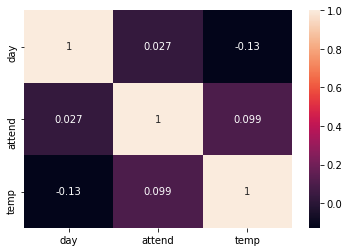

In [5]:
# Correlation Matrix
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

I like to start off by seeing which variables have med/high positive/negative correlation to the
target variable I am looking at. Nothing has a value close to 1 or -1.

### Box Plots

Text(0.5, 1.0, 'Overall Attendance')

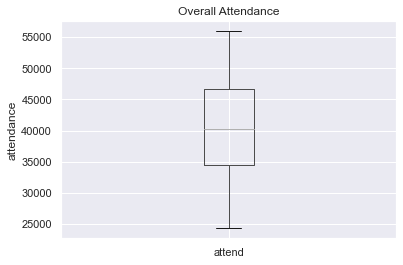

In [6]:
# Looking at boxplot of overall attendance
sns.set(style="darkgrid")
boxplot = df.boxplot(column=['attend'])
plt.ylabel('attendance')
plt.title('Overall Attendance')

Text(0.5, 1.0, 'Attendance by Day of Week')

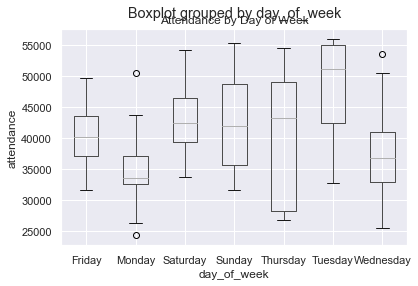

In [7]:
# Boxplot by day of week
sns.set(style="darkgrid")
boxplot = df.boxplot(column=['attend'],by='day_of_week')
plt.ylabel('attendance')
plt.title('Attendance by Day of Week')

Boxplot Results show that Monday has the lowest attendance (mean).

Text(0.5, 1.0, 'Attendance by Month')

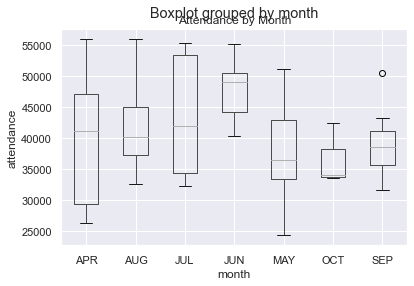

In [8]:
# Boxplot by day of month
sns.set(style="darkgrid")
boxplot = df.boxplot(column=['attend'],by='month')
plt.ylabel('attendance')
plt.title('Attendance by Month')

Boxplot Results show that October has lowest attendance, and also the least variability
October is also the coldest month. Will look closer in scatter plots.

### Scatter Plots

# Replacing data for scattergraph/
df = df.replace('JAN', 1, regex=True)
df = df.replace('FEB', 2, regex=True)
df = df.replace('MAR', 3, regex=True)
df = df.replace('APR', 4, regex=True)
df = df.replace('MAY', 5, regex=True)
df = df.replace('JUN', 6, regex=True)
df = df.replace('JUL', 7, regex=True)
df = df.replace('AUG', 8, regex=True)
df = df.replace('SEP', 9, regex=True)
df = df.replace('OCT', 10, regex=True)
df = df.replace('NOV', 11, regex=True)
df = df.replace('DEC', 12, regex=True)

df = df.replace('Sunday', 1, regex=True)
df = df.replace('Monday', 2, regex=True)
df = df.replace('Tuesday', 3, regex=True)
df = df.replace('Wednesday', 4, regex=True)
df = df.replace('Thursday', 5, regex=True)
df = df.replace('Friday', 6, regex=True)
df = df.replace('Saturday', 7, regex=True)



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


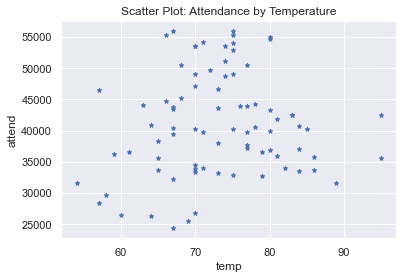

In [9]:
sns.set(style="darkgrid")
# Scatter Plot - Attendance by Temperature
df.plot.scatter(x='temp', y='attend', marker='*')
plt.title('Scatter Plot: Attendance by Temperature') # that's what you're after
plt.show()



Plot shows that lowest attendance happens with lower temperatures.
Now I am going to plot attendance, temperature by month to validate

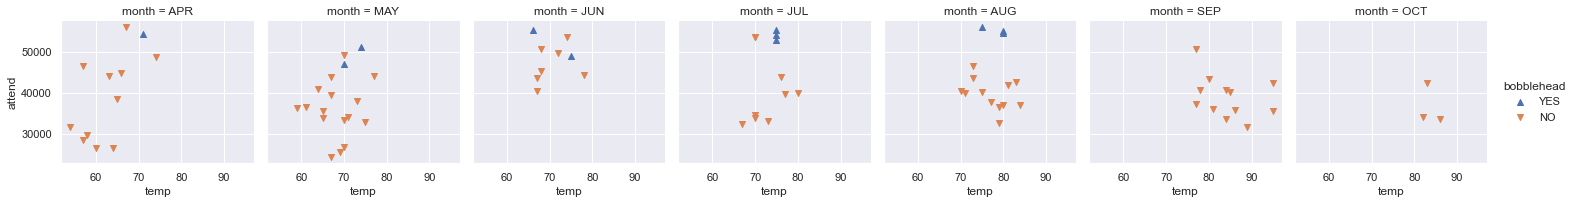

In [10]:
# looking at charts based on month and bobblehead promo
sns.set(style="darkgrid")
p = sns.FacetGrid(df, col="month", hue="bobblehead",hue_order=["YES", "NO"],hue_kws=dict(marker=["^", "v"]))
p.map(plt.scatter, "temp", "attend")
p.add_legend()
plt.show()

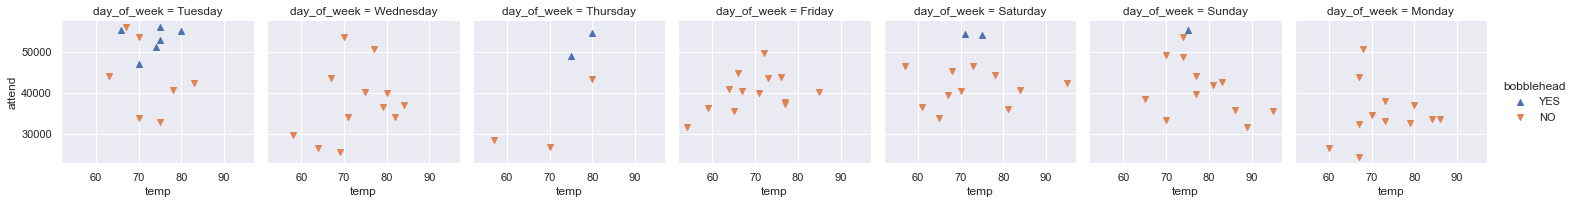

In [11]:
# looking at charts based on day of week and bobblehead promo
p = sns.FacetGrid(df, col="day_of_week", hue="bobblehead",hue_order=["YES", "NO"],hue_kws=dict(marker=["^", "v"]))
p.map(plt.scatter, "temp", "attend")
p.add_legend()
plt.show()

decided to go with both day and month

## Regression Model


In [12]:
# Split the group into training and test sets

# split dataset
data = df.values
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(81, 11) (81,)
(56, 11) (25, 11) (56,) (25,)


In [13]:
# Split the data set into test and train for the model
np.random.seed(3)
df['split'] = uniform.rvs(loc = 0, scale = 1, size = len(df))
df_train = df[df['split'] >= 0.33]
df_test = df[df['split'] < 0.33]

In [14]:
# Regression model which predicts attendance based on day of week + bobblehead
regression = str('attend ~ month + day_of_week + bobblehead')

In [15]:
# presents Results of regression model
r_results = smf.ols(regression, data = df_train).fit()
print(r_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 attend   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     3.886
Date:                Fri, 17 Sep 2021   Prob (F-statistic):           0.000709
Time:                        11:15:35   Log-Likelihood:                -497.22
No. Observations:                  50   AIC:                             1020.
Df Residuals:                      37   BIC:                             1045.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

# Final Recommendation
Regression model shows that the bobblehead promotion does have an impact on attendance as
seen by a p-value of < 0.05. Monday has the lowest attendance with highest variability.
I recommend making Monday Night a promo night with bobbleheads in order to increase attendance.

